# Welcome to Week 11!
This week, you will examine the following: density-based spatial clustering of applications with noise (DBSCAN), hierarchical agglomerative clustering (HAC), linkage methods in HAC, and the use of dendrograms to choose clusters.

## Learning Objectives:
At the end of this week, you should be able to: 
- Explain how DBSCAN applies to cluster datasets and how it identifies core, border, and noise points based on given $\varepsilon$ and MinPts values. 
- Define a cluster in DBSCAN based on the concept of core point connectivity. 
- Compare and contrast linkage methods (single, complete, average, Ward’s) in hierarchical agglomerative clustering and explain how each influences cluster merging. 
- Interpret dendrograms to determine a suitable number of clusters in HAC. 

## 11.1 Lesson: DBSCAN, Types of Points, and Clusters

### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
DBSCAN is a powerful clustering algorithm that not only groups similar points together but also detects outliers—those data points that don’t quite belong anywhere. 

Here’s an example of its utility: 
- A city planner could use DBSCAN to identify clusters of traffic accidents across a city to determine high-risk areas while filtering out isolated incidents as noise. This helps in targeting specific locations for safety improvements such as better signage or traffic-calming measures. 

What makes DBSCAN stand out? 
- Unlike K-means, which assumes clusters are nicely shaped like spheres, DBSCAN can discover clusters of any shape—even oddly shaped ones like spirals or rings. It does this by looking for dense regions of points separated by areas of lower density. With DBSCAN, unlike K-means, it is not necessary to select a specific number of clusters.

### How It works:
DBSCAN Is controlled by two key parameters:
1. **$\varepsilon$ (epsilon):** This defines the neighborhood radius. Two points are considered **neighbors** if they are no more than $\varepsilon$ units apart. Choosing an $\varepsilon$ that is too small or too large causes problems.
- A small $\varepsilon$ creates tight neighborhoods, often labeling many points as noise.
- A large $\varepsilon$ can lump distant points together, possibly merging everything into a single mmassive cluster.
2. **MinPts:** This is the minimum number of points (including the point itself) required to be within an $\varepsilon$-radius neighborhood for a point to be considered a **core point**. 

### The Three Types of Points:
Based on $\varepsilon$ and MinPts, DBSCAN classifies points into three categories:
- **Core Points:** These have at least MinPts neighbors within their $\varepsilon$-radius. They are at the heart of a **dense region**.
- **Border Points:** These are close to core points (within $\varepsilon$) but don't have enough neighbors within their own $\varepsilon$ to be core points themselves.
- **Noise points:** These don't belong to any cluster. They're too isolated to be considered part of a dense region. This makes the algorithm robust to outliers. 

To be more precise, a dense region is a connected group of epsilon-neighborhoods of core points. Each core point in the region is within ﻿ϵ﻿ of another, and the core points are all linked together in this sense. A cluster is a maximal dense region (the largest possible dense region, including all core points that can be linked to it). 

### What Is a Cluster?
In other words, a cluster in DBSCAN is a connected group of core points, each reachable from another by stepping from one core point to the next within $\varepsilon$. Border points that are directly reachable from core points are included, too. This structure allows DBSCAN to find complex, non-convex shapes that other algorithms miss.

## 11.2 Lesson: HAC, Linkage Methods, and Dendrograms

### Hierarchical Agglomerative Clustering (HAC): A Cookie Example
Hierarchical agglomerative clustering, or HAC, is a clustering method that builds groups step by step. It starts with each item in its own cluster and keeps merging the closest ones until everything is grouped together.

Let’s say we want to group five cookies by their diameters: 4 cm, 4.5 cm, 6 cm, 7 cm, and 11 cm. 

In [6]:
import pandas as pd
import numpy as np

cookie_dict = {'ID' : [1, 2, 3, 4, 5],
               'Diameter' : [4, 4.5, 6, 7, 11]}
df = pd.DataFrame(cookie_dict)

df

,ID,Diameter
0,1,4.0
1,2,4.5
2,3,6.0
3,4,7.0
4,5,11.0


First, we look for the pair with the smallest distance. That would be the 4-cm and 4.5-cm cookies, which are just 0.5 cm apart. We merge them into a single cluster:

$$ (4, 4.5), (6), (7), (11)$$

In [7]:
# find all of the distances between the cookies

# collect all distances between cookies
distances = []
for i in range(len(df)): # outer loop picks the first cookie
    for j in range(i + 1, len(df)): # inner loop picks every cook after the first one
        distances.append((df['ID'][i], df['ID'][j], abs(df['Diameter'][i] - df['Diameter'][j]))) # calculate the absolute distance between the two cookies    
distances = sorted(distances, key=lambda x: x[2]) # sort distances by the distance value
# print the distances
for d in distances:
    print(f"Distance between cookie {d[0]} and cookie {d[1]}: {d[2]} cm")

Distance between cookie 1 and cookie 2: 0.5 cm
Distance between cookie 3 and cookie 4: 1.0 cm
Distance between cookie 2 and cookie 3: 1.5 cm
Distance between cookie 1 and cookie 3: 2.0 cm
Distance between cookie 2 and cookie 4: 2.5 cm
Distance between cookie 1 and cookie 4: 3.0 cm
Distance between cookie 4 and cookie 5: 4.0 cm
Distance between cookie 3 and cookie 5: 5.0 cm
Distance between cookie 2 and cookie 5: 6.5 cm
Distance between cookie 1 and cookie 5: 7.0 cm


In [9]:
# distances is already sorted by distance ascending
# so distances[0] is the tuple for the closest two cookies:
#   (ID_i, ID_j, distance)
id_i, id_j, distance = distances[0] # get the first distance (the smallest one)
print(f"\nThe smallest distance is between cookie {id_i} and cookie {id_j}, which is {distance} cm.")

# initialize every cookie as "noise" (cluster = -1)
df['Cluster'] = -1

# assign cluster 0 to just those ids
df.loc[df['ID'].isin([id_i, id_j]), 'Cluster'] = 0

# print the updated DataFrame
print("\nUpdated DataFrame with clusters:")
print(df)


The smallest distance is between cookie 1 and cookie 2, which is 0.5 cm.

Updated DataFrame with clusters:
   ID  Diameter  Cluster
0   1       4.0        0
1   2       4.5        0
2   3       6.0       -1
3   4       7.0       -1
4   5      11.0       -1


In [11]:
# dbscan example
from sklearn.cluster import DBSCAN
X = df[['Diameter']].values
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(X)
df['Cluster'] = dbscan.labels_
print("\nDBSCAN clustering result:")
print(df)


DBSCAN clustering result:
   ID  Diameter  Cluster
0   1       4.0        0
1   2       4.5        0
2   3       6.0       -1
3   4       7.0       -1
4   5      11.0       -1


Next, we merge 6 and 7 cm because they are 1 cm apart. That’s closer than the next-smallest option (6 and 4.5, which are 1.5 cm apart, or 11 and 7, which are 4 cm apart). We now have: 

$$ (4, 4.5), (6, 7), (11)$$

In [13]:
X = df[['Diameter']].values
dbscan = DBSCAN(eps=1, min_samples=2) #stepped up to 1 to make two clusters
dbscan.fit(X)
df['Cluster'] = dbscan.labels_

print("\nDBSCAN clustering result with eps=1:")
print(df)


DBSCAN clustering result with eps=1:
   ID  Diameter  Cluster
0   1       4.0        0
1   2       4.5        0
2   3       6.0        1
3   4       7.0        1
4   5      11.0       -1


Assuming we’re using single linkage (where we compare the closest points in each cluster), we then merge $(4, 4.5)$ with $(6,7)$, since the closest points -4.5 and 6- are 1.6 cm apart. That's still less than the 4 cm between 7 and 11:

$$(4, 4.5, 6, 7), (11)$$

In [15]:
X = df[['Diameter']].values
dbscan = DBSCAN(eps=1.5, min_samples=2) #stepped up to 1 to make two clusters
dbscan.fit(X)
df['Cluster'] = dbscan.labels_

print("\nDBSCAN clustering result with eps=1.5:")
print(df)


DBSCAN clustering result with eps=1.5:
   ID  Diameter  Cluster
0   1       4.0        0
1   2       4.5        0
2   3       6.0        0
3   4       7.0        0
4   5      11.0       -1


Finally, we merge in the last cookie:

$$(4, 4.5, 6, 7, 11)$$

In [19]:
eps_values = [0.5, 1, 1.5, 4]

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=2)
    dbscan.fit(X)
    df['Cluster'] = dbscan.labels_
    print(df['Cluster'].nunique(), "clusters for eps =", eps)

2 clusters for eps = 0.5
3 clusters for eps = 1
2 clusters for eps = 1.5
1 clusters for eps = 4


### Linkage Methods in HAC
HAC uses different rules, called linkage criteria, to decide how to measure the distance between clusters. Here are the four most common:

1. **Single Linkage**
- This compares the closest points in two clusters. In our earlier step, we merged $(4 , 4.5)$ and $(6 , 7)$ because 4.5 and 6 were only 1.5 cm apart. To compare $(6 , 7)$ and $(11)$, we’d look at the closest pair — 7 and 11 — which are 4 cm apart.
2. **Complete linkage**
- This compares the farthest points in two clusters. For $(4, 4.5)$ and $(6 , 7)$, the farthest pair is 4 and 7, which are 3 cm apart. For $(6 , 7)$ and $(11)$, the farthest points are 6 and 11, which are 5 cm apart.
3. **Average Linkage**
- This takes the average of all distances between pairs from two clusters. For $(4, 4.5)$ and $(6, 7)$, we calculate:
    - 4 to 6 = 2
    - 4 to 7 = 3
    - 4.5 to 6 = 1.5
    - 4.5 to 7 = 2.5
- The average of these four distances is $\frac{2 + 3 + 1.5 + 2.5}{4} = 2.25$
4. **Ward's Method**
- This one is a bit different. Ti merges the clusters that would cause the smallest increase in overall variance (or error). For example, with (4, 4.5) and (6, 7), we first find the overall mean:
    - $\frac{4 + 4.5 + 6 + 7}{4} = 5.375$
- Then we calculate how far each value is from that mean, square those differences, and add them up:
    - $(4 - 5.375)^2$
    - $(4.5 - 5.375)^2$
    - $(6 - 5.375)^2$
    - $(7 - 5.375)^2$
- The sum gives us a measure of error. We do the same for the individual clusters before merging and compare the difference. That is, we take the average of the four (a-d) and then subtract the similar averages for (a-b) and (c-d) separately. Ward’s method chooses the pair that causes the smallest increase in this total squared error. Because Ward’s method uses the sum of squared errors rather than the mean squared error, it can favor merging smaller clusters rather than larger ones. It tends to form more spherical clusters, a bit like K-means, whereas (at the other extreme) single linkage can form very strangely shaped clusters. 

In [29]:
df2 = pd.DataFrame(cookie_dict)
df2 = df2.loc[df2['Diameter'] > 4.5].copy()

from sklearn.cluster import AgglomerativeClustering

# X = your data array, e.g. df[['Diameter']].values
hc = AgglomerativeClustering(
    n_clusters=None,       # or an integer if you know how many clusters you want
    distance_threshold=0,  # use this to build full tree; otherwise set n_clusters
    metric='euclidean',  # distance metric
    linkage='average'     # one of 'ward', 'complete', 'average', or 'single'
)

X = df2[['Diameter']].values
hc.fit(X)
df2['cluster'] = hc.labels_
print("\nAgglomerative Clustering result:")
print(df2)



Agglomerative Clustering result:
   ID  Diameter  cluster
2   3       6.0        2
3   4       7.0        1
4   5      11.0        0


### Dendrograms and Choosing Clusters
To visualize HAC, we use a dendrogram—a tree-like diagram that shows which clusters were merged and when:

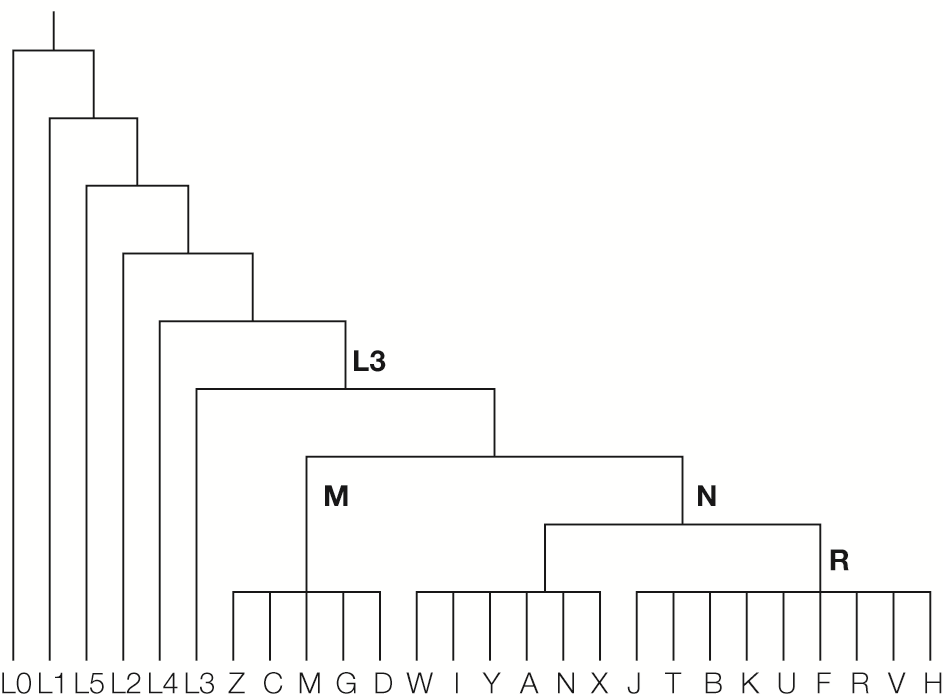

This dendrogram depicts relationships among patterns within mitochondrial DNA. Clusters M and N are inside cluster L3, and cluster R is inside N. Within cluster M, it looks like there are five “leaf” patterns (clusters of size one): Z, C, M, G, D, and W. 

One of the nice things about HAC is that you don’t have to decide how many clusters you want ahead of time. Once the dendrogram is built, you can choose how many clusters to keep by “cutting” the tree at a certain height. For example, if we decide to stop at three clusters, we’d have: 

$$(4, 4.5), (6, 7), (11)$$

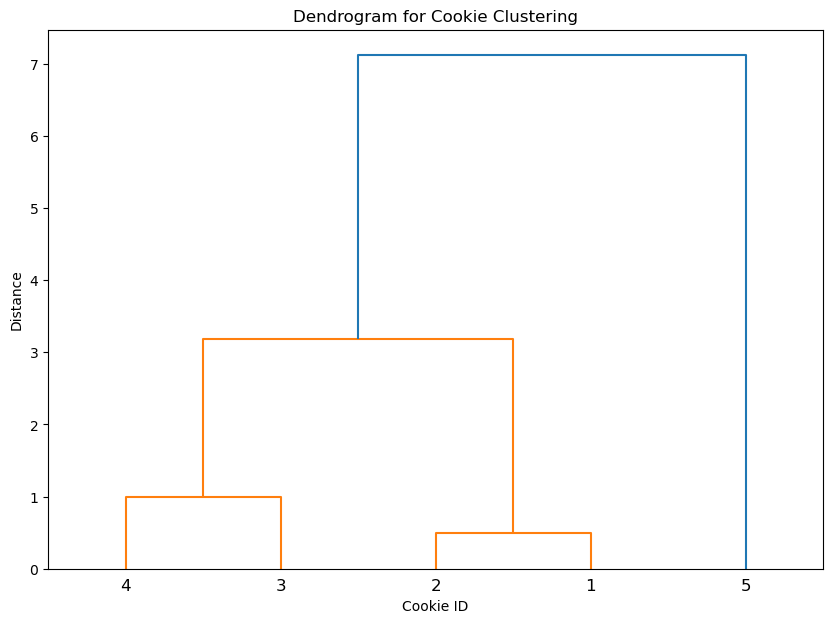

In [30]:
# create a dendrogram for the original dataframe
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
X = df[['Diameter']].values
linked = linkage(X, method='ward')  # 'ward' is a common choice for hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df['ID'].astype(str).values, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Cookie Clustering')
plt.xlabel('Cookie ID')
plt.ylabel('Distance')
plt.show()

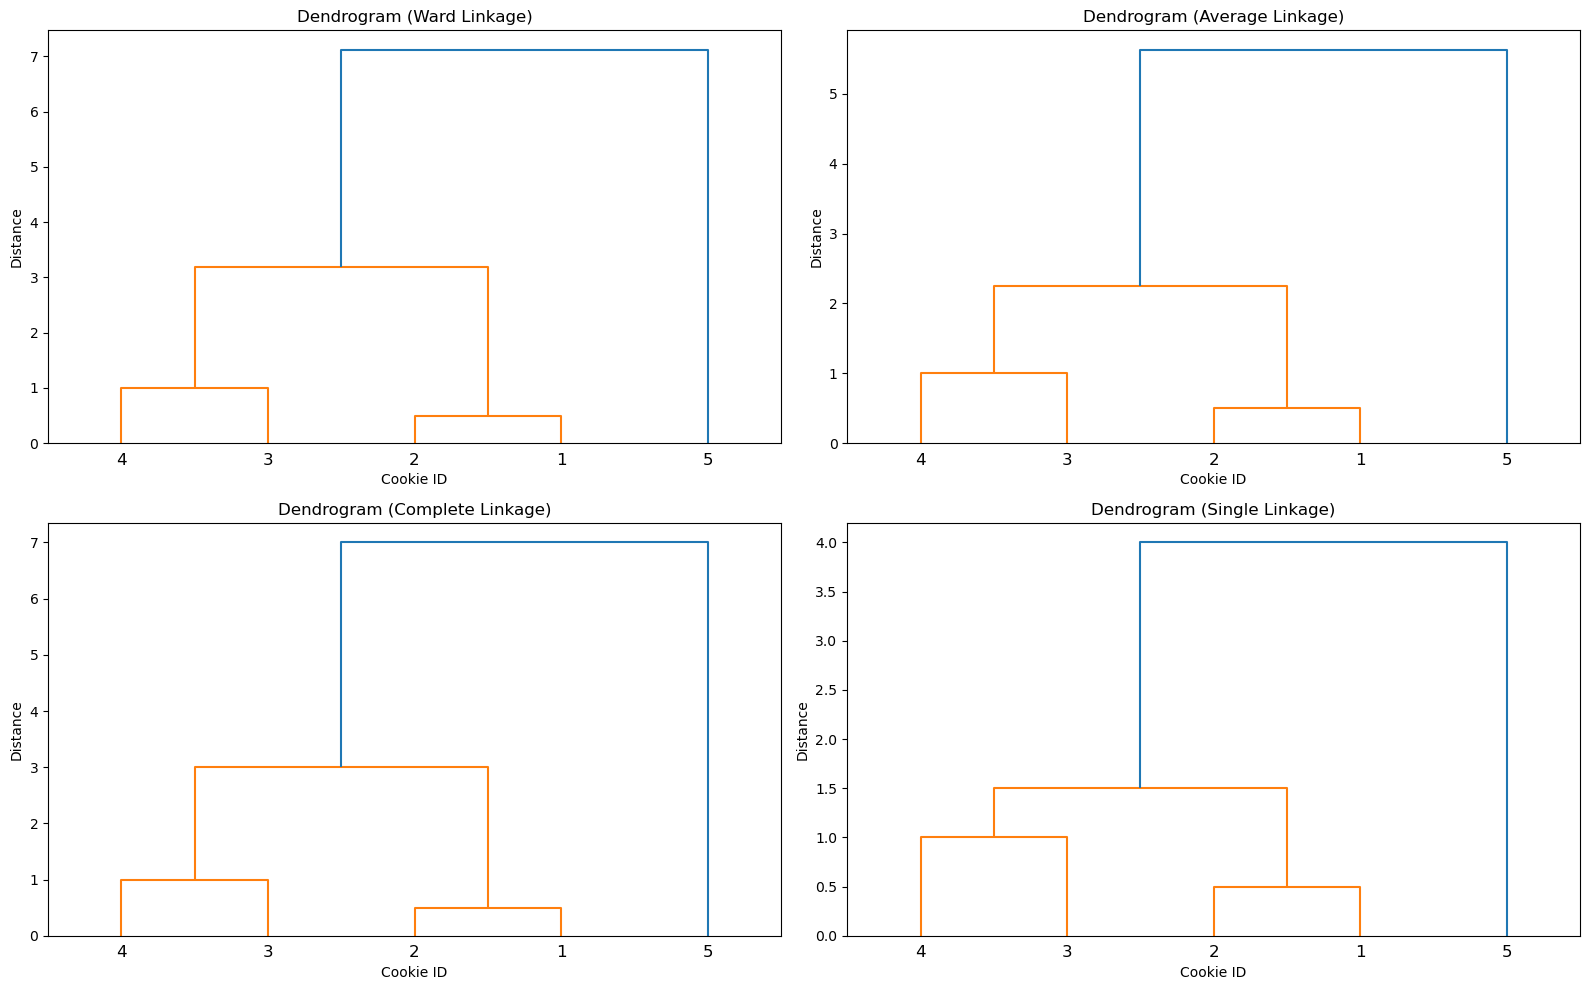

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt

linkage_methods = ['ward', 'average', 'complete', 'single']
plt.figure(figsize=(16, 10))

for idx, method in enumerate(linkage_methods):
    linked = linkage(df[['Diameter']].values, method=method)
    plt.subplot(2, 2, idx + 1)
    dendrogram(
        linked,
        orientation='top',
        labels=df['ID'].astype(str).values,
        distance_sort='descending',
        show_leaf_counts=True
    )
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Cookie ID')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()